In [34]:
!pip install --upgrade pip
!pip install ipykernel
!pip install seaborn
!pip install pandas


'pip' is not recognized as an internal or external command,
operable program or batch file.


'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [35]:
!pip install numpy==1.26.4 scipy==1.13.0 scikit-learn==1.4.2
!pip install scikit-learn matplotlib

'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [36]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score 
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import joblib

In [37]:
# Training the Model

main_voc_df = pd.read_csv('training_set.csv')  
X = main_voc_df.drop(columns=['Label'])
y = main_voc_df['Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

svm_classifier = SVC(
    class_weight='balanced',
    random_state=42
)

model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', svm_classifier)
])


grid_search = GridSearchCV(model_pipeline, param_grid, cv=3, n_jobs=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_



ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [38]:

joblib.dump(best_model, 'svm_best_model.joblib')
print('Model saved as svm_best_model.joblib.')

Model saved as svm_best_model.joblib.


C:\Users\ben\AppData\Local\Temp\ipykernel_19108\130573307.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


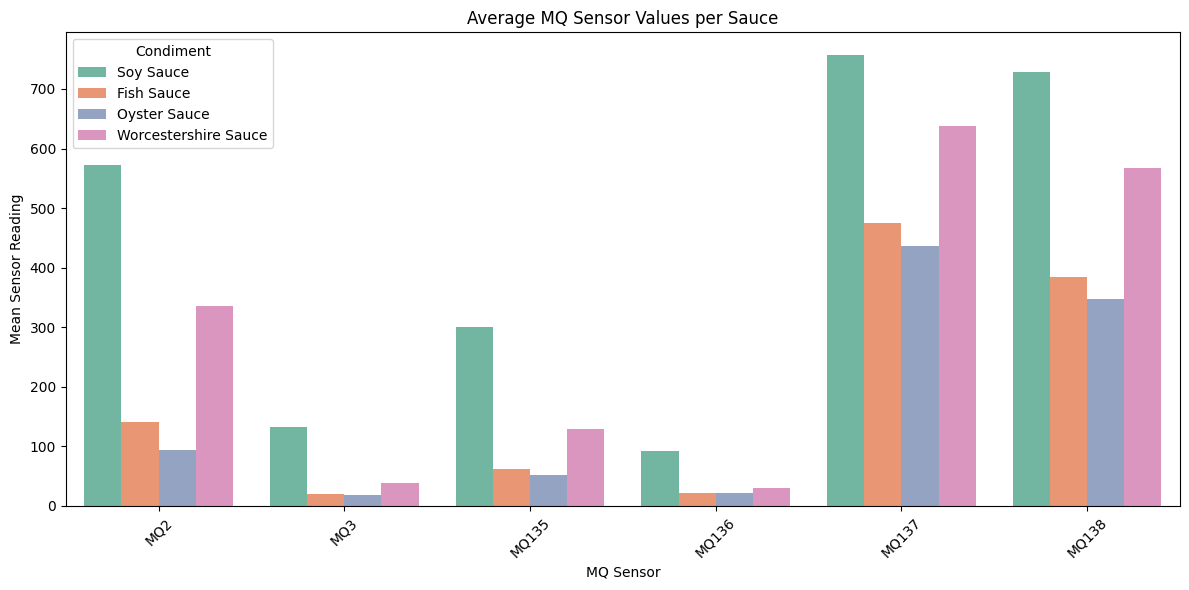

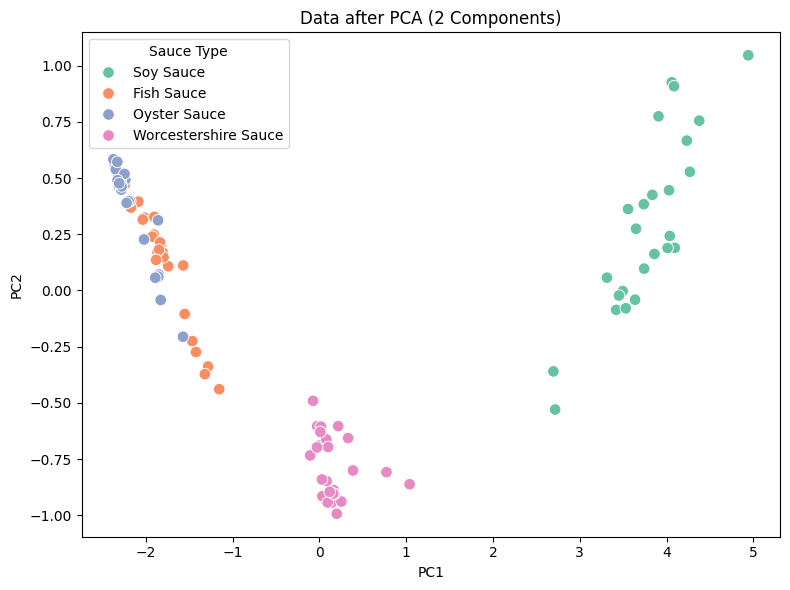

In [39]:
melted_df = main_voc_df.melt(
    id_vars="Label",
    value_vars=[col for col in main_voc_df.columns if "MQ" in col],
    var_name="Sensor",
    value_name="Value"
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=melted_df,
    x="Sensor",
    y="Value",
    hue="Label",
    ci=None,
    palette="Set2"
)

plt.title("Average MQ Sensor Values per Sauce")
plt.ylabel("Mean Sensor Reading")
plt.xlabel("MQ Sensor")
plt.xticks(rotation=45)
plt.legend(title="Condiment")
plt.tight_layout()
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df['Label'] = y.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Label", palette="Set2", s=70)
plt.title("Data after PCA (2 Components)")
plt.legend(title="Sauce Type")
plt.tight_layout()
plt.show()


Best Hyperparameters:


,Hyperparameter,Value
0,classifier__C,10
1,classifier__degree,2
2,classifier__gamma,1
3,classifier__kernel,rbf
4,pca__n_components,3



Evaluation Metrics (Unseen Data):


,Metric,Value
0,Accuracy,0.7500
1,Macro F1 Score,0.6875



Classification Report:
                      precision    recall  f1-score   support

           Soy Sauce       0.00      0.00      0.00         2
          Fish Sauce       0.60      1.00      0.75         3
        Oyster Sauce       1.00      1.00      1.00         2
Worcestershire Sauce       1.00      1.00      1.00         1

            accuracy                           0.75         8
           macro avg       0.65      0.75      0.69         8
        weighted avg       0.60      0.75      0.66         8



c:\Users\ben\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ben\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ben\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

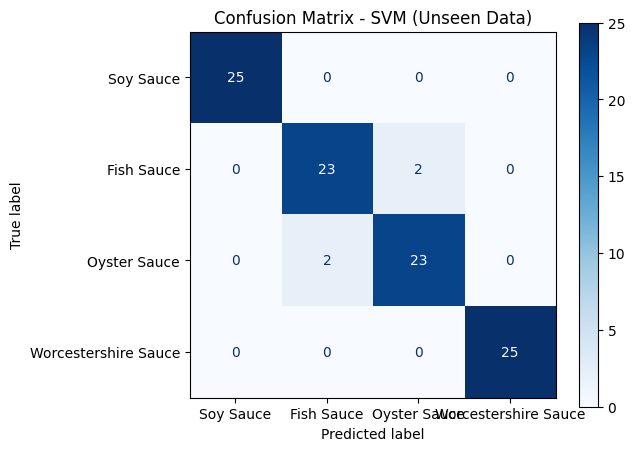


Misclassified Trials:


,True Label,Predicted Label,Correct
2,Fish Sauce,Oyster Sauce,False
3,Fish Sauce,Oyster Sauce,False



All Predictions:


,True Label,Predicted Label,Correct
0,Soy Sauce,Soy Sauce,True
1,Soy Sauce,Soy Sauce,True
2,Fish Sauce,Oyster Sauce,False
3,Fish Sauce,Oyster Sauce,False
4,Oyster Sauce,Oyster Sauce,True
5,Oyster Sauce,Oyster Sauce,True
6,Oyster Sauce,Oyster Sauce,True
7,Worcestershire Sauce,Worcestershire Sauce,True


In [40]:
new_df = pd.read_csv('sauce_trials_summary_mean.csv')
X_new = new_df.drop(columns=['Label'])
Y_new = new_df['Label']

predictions = best_model.predict(X_new)

accuracy = accuracy_score(Y_new, predictions)
f1_macro = f1_score(Y_new, predictions, average='macro')

best_params_df = pd.DataFrame(
    list(grid_search.best_params_.items()),
    columns=['Hyperparameter', 'Value']
)
print("\nBest Hyperparameters:")
display(best_params_df)

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Macro F1 Score'],
    'Value': [f"{accuracy:.4f}", f"{f1_macro:.4f}"]
})
print("\nEvaluation Metrics (Unseen Data):")
display(metrics_df)

print("\nClassification Report:")
print(classification_report(Y_new, predictions, target_names=Y_new.unique()))

labels = Y_new.unique()  # Preserves label order from CSV
conf_matrix = confusion_matrix(Y_new, predictions, labels=labels)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - SVM (Unseen Data)")
plt.tight_layout()
plt.show()


results_df = pd.DataFrame({
    'True Label': Y_new,
    'Predicted Label': predictions
})
results_df['Correct'] = results_df['True Label'] == results_df['Predicted Label']

misclassified = results_df[~results_df['Correct']]

print("\nMisclassified Trials:")
display(misclassified)

print("\nAll Predictions:")
display(results_df)
#